<a href="https://colab.research.google.com/github/MandyMP/Algoritmo_arvore_de_decisao/blob/main/P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import export_graphviz
import graphviz

Leitura de dataset

In [2]:
data = pd.read_excel('/content/drive/MyDrive/credit_card_clients (2).xls', header=1)
print(data.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Inspeção de dados

In [4]:
# Informações básicas do dataset: número de linhas, colunas, tipos de dados e se há valores ausentes:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
# Estatísticas descritivas das colunas numéricas do dataset, como média, desvio padrão, mínimo, máximo e quartis
print(data.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

In [6]:
# Verificar valores ausentes
print(data.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [7]:
#Verificar tipos de dados
print(data.dtypes)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [8]:
#Identificando as colunas do tipo objeto
colunas_objeto = data.select_dtypes(include=['object']).columns

In [9]:
#Transformando para um tipo numerico
data[colunas_objeto] = data[colunas_objeto].apply(pd.to_numeric, errors='coerce')

In [10]:
#Verificar tipos de dados
print(data.dtypes)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


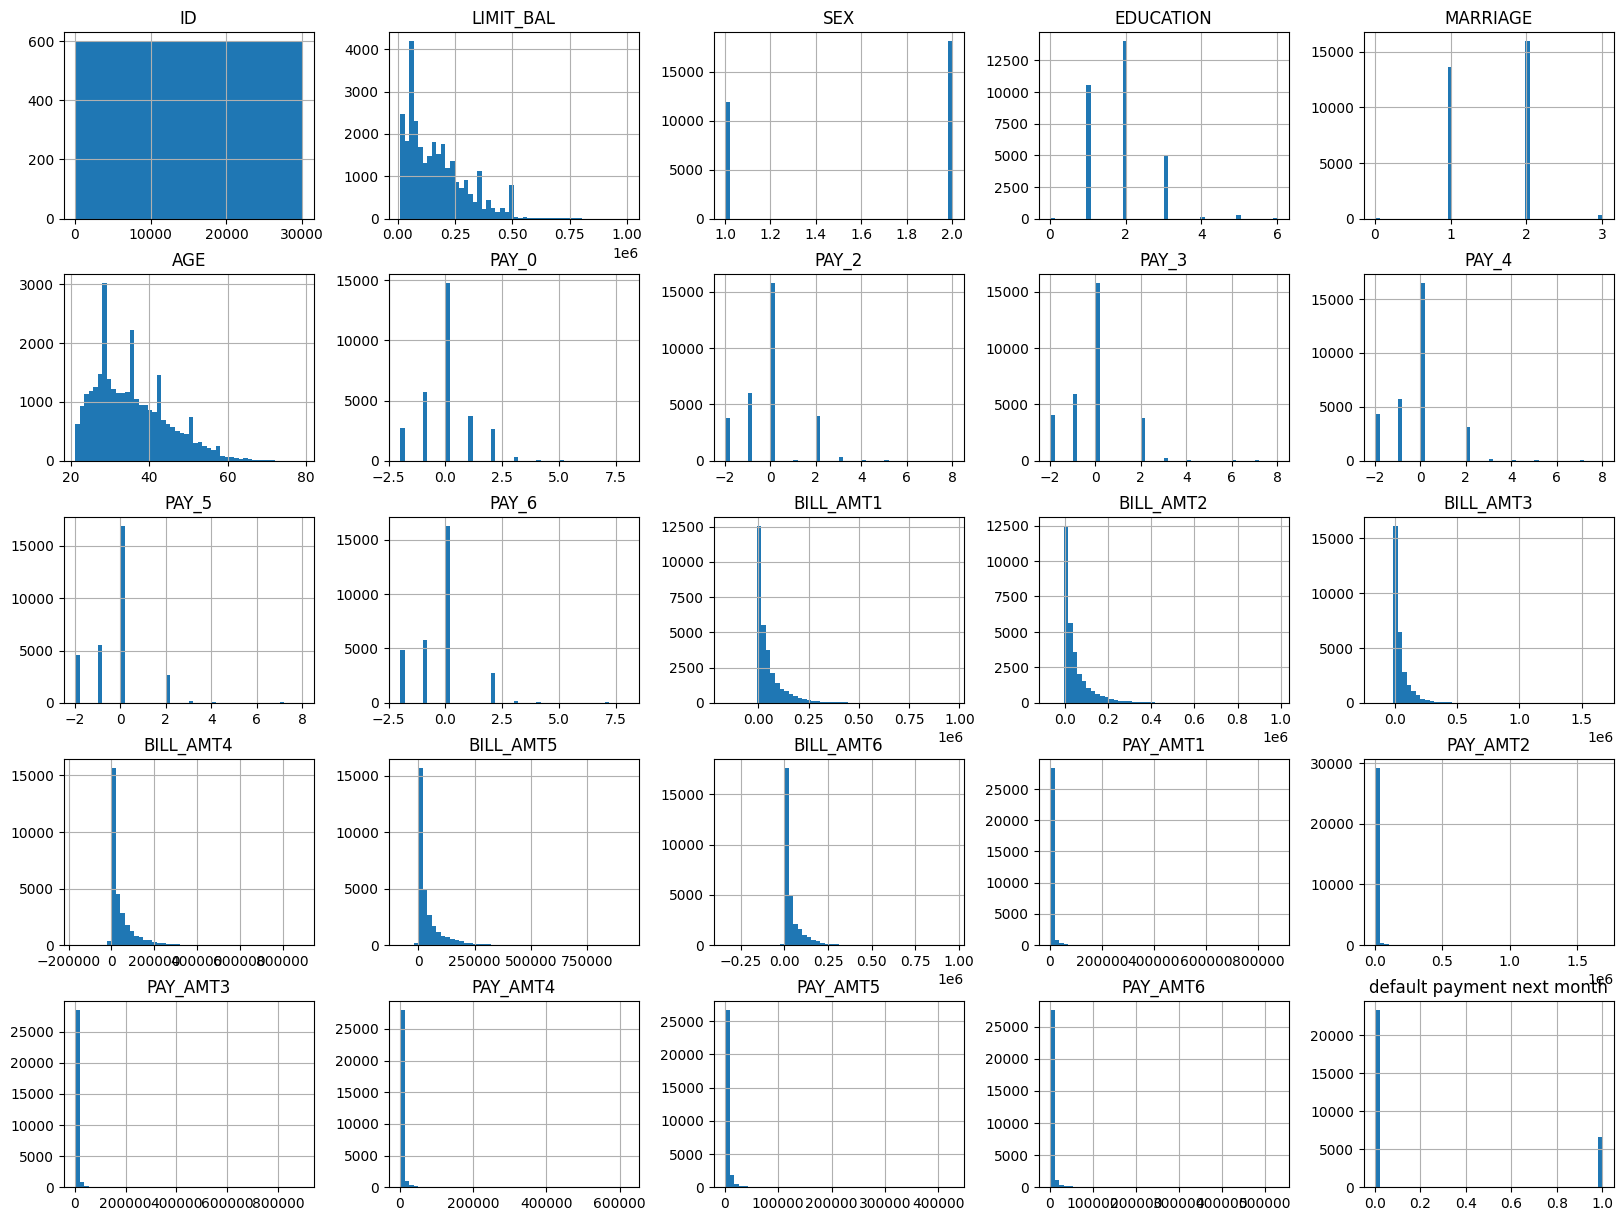

In [11]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [12]:
# Verificar valores ausentes
print(data.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


Pre-processamento

In [13]:
# Visualizar as primeiras linhas do conjunto de dados
print(data.head())

# Verificar estatísticas descritivas do conjunto de dados
print(data.describe())

# Verificar informações sobre as colunas do conjunto de dados
print(data.info())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [14]:
# Definir os recursos (X) e a variável alvo (y)
X = data[['SEX']]
y = data['EDUCATION']

X = X.values.reshape(-1, 1)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Criar uma instância do modelo de árvore de decisão
modelo_arvore = DecisionTreeClassifier()

# Treinar o modelo de árvore de decisão
modelo_arvore.fit(X_train, y_train)


DecisionTreeClassifier()

In [16]:
previsoes = modelo_arvore.predict(X_test)
modelo_arvore.feature_importances_

array([1.])

In [17]:
acuracia = accuracy_score(y_test, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 47.40%


In [18]:
def executar_validador(X, y):
  validador = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
  for treino_id, teste_id in validador.split(X, y):
    X_train, X_test = X[treino_id], X[teste_id]
    y_train, y_test = y[treino_id], y[teste_id]
  return X_train, X_test, y_train, y_test

In [19]:

%%time


def executar_classificador(classificador, X_train, X_test, y_train):
  arvore = classificador.fit(X_train, y_train)
  y_pred = arvore.predict(X_test)
  return y_pred

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [20]:
def salvar_arvore(classificador, nome):
  plt.figure(figsize=(200,100))
  tree.plot_tree(classificador, filled=True, fontsize=14)
  plt.savefig(nome)
  plt.close()

In [21]:

def validar_arvore(y_test, y_pred):
  print(accuracy_score(y_test, y_pred))
  print(precision_score(y_test, y_pred))
  print(recall_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))


In [22]:


X_train, X_test, y_train, y_test = executar_validador(X, y)

In [23]:
#execucao do classificador DecisionTreeClassifier
classificador_arvore_decisao = tree.DecisionTreeClassifier()
y_pred_arvore_decisao = executar_classificador(classificador_arvore_decisao, X_train, X_test, y_train)


In [24]:
#criacao da figura da arvore de decisao
salvar_arvore(classificador_arvore_decisao, "arvore_decisao1.png")


In [25]:
print(classificador_arvore_decisao)
print(classificador_arvore_decisao.get_depth())

DecisionTreeClassifier()
1


In [26]:

# Gerar o gráfico da árvore de decisão
dot_data = export_graphviz(modelo_arvore, out_file=None, filled=True)
grafico = graphviz.Source(dot_data)


In [27]:
grafico.view()


'Source.gv.pdf'